In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#Loading the Dataset
phishing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Training_set_label.csv" )

In [23]:
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,...,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,...,0,zero,0,164,1662,312044,0,0,4,legitimate


In [24]:
phishing_data.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11476,https://623112j4j3.codesandbox.io/index.html,44,25,0,3,0,0,0,0,0,...,0,zero,0,122,1338,22211,0,1,6,phishing
11477,http://en.academic.ru/dic.nsf/enwiki/279719,43,14,0,3,0,0,0,0,0,...,1,Zero,0,148,7158,2294,0,1,3,legitimate
11478,http://www.neutralsources.com/-/re.html,39,22,0,3,1,0,0,0,0,...,1,zero,0,161,570,0,0,1,2,phishing
11479,http://www.pwc.com/gx/en/financial-services/fi...,114,11,0,3,6,0,0,0,0,...,1,one,0,476,6828,5269,0,0,7,legitimate
11480,http://y9o5m.codesandbox.io/onedrive.html,41,20,0,3,0,0,0,0,0,...,0,zero,0,123,1337,20989,0,1,6,phishing


In [25]:
#Cherry Picking predictors variables
phishing_data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [26]:
phishing_data.describe()

,length_url,length_hostname,nb_dots,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,...,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.0,11481.000000,11481.000000,11481.000000,...,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,1.148100e+04,11481.000000,11481.000000,11481.000000
mean,61.203902,21.129344,2.496298,0.022124,0.140928,0.168975,0.0,0.299364,0.334117,0.006707,...,0.001394,0.125425,0.773713,0.074122,492.388468,4059.613884,8.630862e+05,0.019598,0.535493,3.190837
std,56.795786,10.633279,1.421589,0.155721,0.365781,0.871249,0.0,1.040306,1.165724,0.081623,...,0.037307,0.331214,0.418445,0.261981,811.349827,3110.854830,2.000251e+06,0.138619,0.498760,2.531696
min,13.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,85.000000,966.000000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,246.000000,4003.000000,2.187000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,452.000000,7006.000000,3.733190e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,24.000000,4.000000,3.000000,19.000000,0.0,19.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12873.000000,1.076799e+07,1.000000,1.000000,10.000000


In [27]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

In [35]:
phishing_data['phish_hints'].value_counts()

0     9411
1     1088
2      462
3      333
4      146
5       28
6        8
10       3
7        2
Name: phish_hints, dtype: int64

In [67]:
#Cherry picking predictor variables
predictor_variables = ['length_url', 'length_hostname', 'nb_dots','domain_registration_length', 
              'domain_with_copyright','google_index','page_rank', 'http_in_path', 'https_token', 
            'suspecious_tld','statistical_report', 'phish_hints']

In [37]:
#checking for null values
phishing_data[predictor_variables].isnull().sum()

length_url                    0
length_hostname               0
nb_dots                       0
domain_registration_length    0
domain_with_copyright         0
google_index                  0
page_rank                     0
http_in_path                  0
https_token                   0
suspecious_tld                0
statistical_report            0
phish_hints                   0
dtype: int64

In [38]:
phishing_data[predictor_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   length_url                  11481 non-null  int64 
 1   length_hostname             11481 non-null  int64 
 2   nb_dots                     11481 non-null  int64 
 3   domain_registration_length  11481 non-null  int64 
 4   domain_with_copyright       11481 non-null  object
 5   google_index                11481 non-null  int64 
 6   page_rank                   11481 non-null  int64 
 7   http_in_path                11481 non-null  int64 
 8   https_token                 11481 non-null  int64 
 9   suspecious_tld              11481 non-null  int64 
 10  statistical_report          11481 non-null  int64 
 11  phish_hints                 11481 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.1+ MB


In [40]:
phishing_data[predictor_variables].select_dtypes(include = 'object').head()

,domain_with_copyright
0,one
1,zero
2,zero
3,one
4,zero


In [41]:
phishing_data['domain_with_copyright'].value_counts()

zero    5323
one     4149
Zero    1088
One      921
Name: domain_with_copyright, dtype: int64

In [42]:
#Converting string type to int type
phishing_data['domain_with_copyright'] = phishing_data['domain_with_copyright'].replace(['Zero'], 'zero')

In [43]:
phishing_data['domain_with_copyright'] = phishing_data['domain_with_copyright'].replace(['One'], 'one')

In [44]:
phishing_data['domain_with_copyright'].value_counts()

zero    6411
one     5070
Name: domain_with_copyright, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [46]:
phishing_data['domain_with_copyright'] = labelEncoder.fit_transform(phishing_data['domain_with_copyright'])

In [47]:
phishing_data['domain_with_copyright'].value_counts()

1    6411
0    5070
Name: domain_with_copyright, dtype: int64

# EDA PART

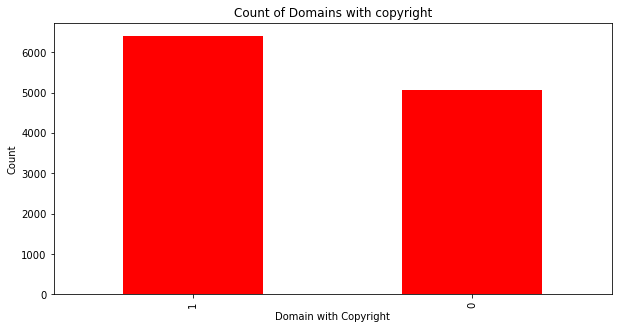

In [54]:
plt.figure(figsize=(10,5))
plt.xlabel('Domain with Copyright')
plt.ylabel('Count')
plt.title('Count of Domains with copyright')
phishing_data['domain_with_copyright'].value_counts().plot(kind='bar', color='red')

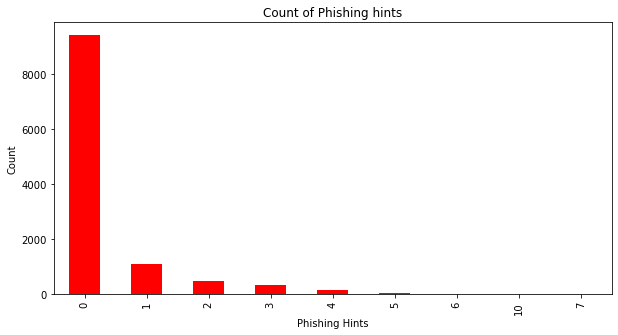

In [56]:
plt.figure(figsize=(10,5))
plt.xlabel('Phishing Hints')
plt.ylabel('Count')
plt.title('Count of Phishing hints')
phishing_data['phish_hints'].value_counts().plot(kind='bar', color='red')

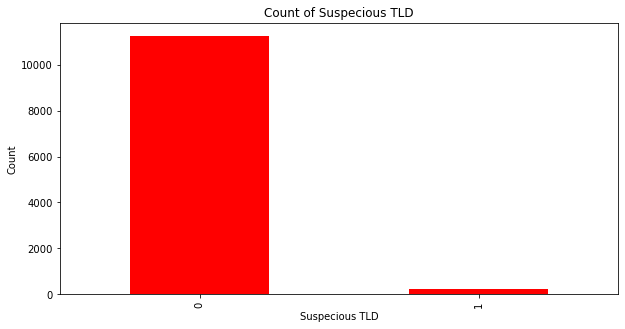

In [58]:
plt.figure(figsize=(10,5))
plt.xlabel('Suspecious TLD')
plt.ylabel('Count')
plt.title('Count of Suspecious TLD')
phishing_data['suspecious_tld'].value_counts().plot(kind='bar', color='red')

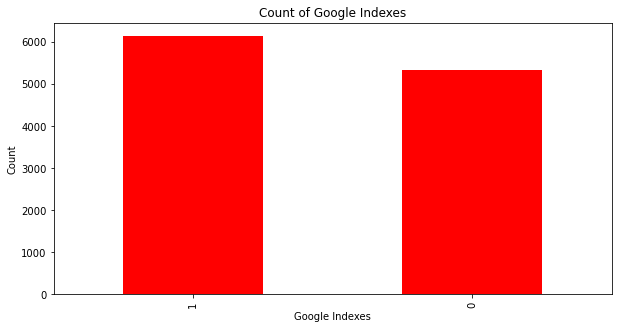

In [59]:
plt.figure(figsize=(10,5))
plt.xlabel('Google Indexes')
plt.ylabel('Count')
plt.title('Count of Google Indexes')
phishing_data['google_index'].value_counts().plot(kind='bar', color='red')

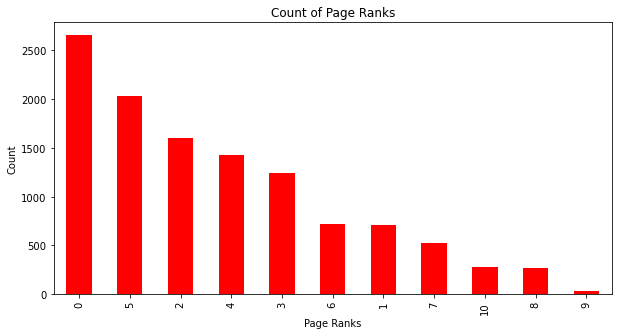

In [60]:
plt.figure(figsize=(10,5))
plt.xlabel('Page Ranks')
plt.ylabel('Count')
plt.title('Count of Page Ranks')
phishing_data['page_rank'].value_counts().plot(kind='bar', color='red')

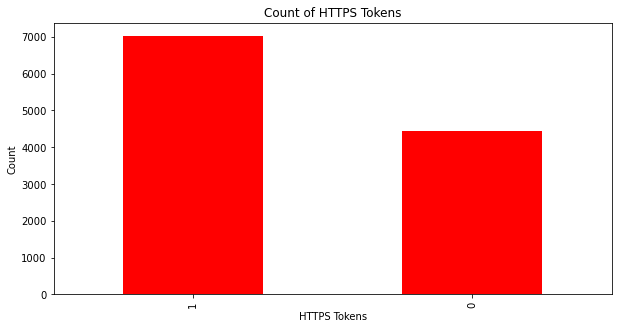

In [61]:
plt.figure(figsize=(10,5))
plt.xlabel('HTTPS Tokens')
plt.ylabel('Count')
plt.title('Count of HTTPS Tokens')
phishing_data['https_token'].value_counts().plot(kind='bar', color='red')

# Partitioning the data set

In [68]:
X = phishing_data[predictor_variables]

In [69]:
X.columns

Index(['length_url', 'length_hostname', 'nb_dots',
       'domain_registration_length', 'domain_with_copyright', 'google_index',
       'page_rank', 'http_in_path', 'https_token', 'suspecious_tld',
       'statistical_report', 'phish_hints'],
      dtype='object')

In [70]:
y = phishing_data['status']

In [71]:
y.head()

0      phishing
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Importing test data set

In [77]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Testing_set_label.csv')

In [78]:
test_data = test_data[predictor_variables]

In [79]:
test_data.columns

Index(['length_url', 'length_hostname', 'nb_dots',
       'domain_registration_length', 'domain_with_copyright', 'google_index',
       'page_rank', 'http_in_path', 'https_token', 'suspecious_tld',
       'statistical_report', 'phish_hints'],
      dtype='object')

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3429 entries, 0 to 3428
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   length_url                  3429 non-null   int64 
 1   length_hostname             3429 non-null   int64 
 2   nb_dots                     3429 non-null   int64 
 3   domain_registration_length  3429 non-null   int64 
 4   domain_with_copyright       3429 non-null   object
 5   google_index                3429 non-null   int64 
 6   page_rank                   3429 non-null   int64 
 7   http_in_path                3429 non-null   int64 
 8   https_token                 3429 non-null   int64 
 9   suspecious_tld              3429 non-null   int64 
 10  statistical_report          3429 non-null   int64 
 11  phish_hints                 3429 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 321.6+ KB


In [81]:
#Converting 'domain_with_copyright' object to int64
test_data['domain_with_copyright'] = test_data['domain_with_copyright'].replace(['Zero'], 'zero')
test_data['domain_with_copyright'] = test_data['domain_with_copyright'].replace(['One'], 'one')
test_data['domain_with_copyright'] = labelEncoder.fit_transform(test_data['domain_with_copyright'])

In [82]:
test_data['domain_with_copyright'].value_counts()

1    1936
0    1493
Name: domain_with_copyright, dtype: int64

# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [84]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
y_preds = dTree.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [87]:
print(confusion_matrix(y_test, y_preds))

[[1666   77]
 [  82 1620]]


In [88]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

  legitimate       0.95      0.96      0.95      1743
    phishing       0.95      0.95      0.95      1702

    accuracy                           0.95      3445
   macro avg       0.95      0.95      0.95      3445
weighted avg       0.95      0.95      0.95      3445



In [94]:
print("Accuracy Score: ", round(accuracy_score(y_test, y_preds) * 100, 2))

Accuracy Score:  95.38


# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [97]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
y_preds_rfc = rfc.predict(X_test)

In [101]:
print(confusion_matrix(y_test, y_preds_rfc))

[[1685   58]
 [  58 1644]]


In [102]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

  legitimate       0.97      0.97      0.97      1743
    phishing       0.97      0.97      0.97      1702

    accuracy                           0.97      3445
   macro avg       0.97      0.97      0.97      3445
weighted avg       0.97      0.97      0.97      3445



In [103]:
print("Accuracy Score: ", round(accuracy_score(y_test, y_preds_rfc) * 100, 2))

Accuracy Score:  96.63


# Conclusion

## ~ We can see that the Random Forest classifier has performed well than Decision Tree Classifier.